# Diamond Price Prediction Using K-Nearest Neighbours Regression Algorithm 

###### Group 5: Jason Wang, Jessie Sheng, Wendy Phung, Clare Pan

## 1 Introduction

Diamond is one of the rarest and hardest naturally occurring substance minerals composed of carbon. Due to its optical property, diamond has become the world's most popular gemstone, and it is one of the gemstones on which more money is spent than any other combined gemstone (Sharma et. al, 2021). Every diamond is unique, and the Gemological Institute of America (GIA) has created a globally accepted system for assessing a diamond's quality using the "4Cs": carat for the weight of the diamond, colour, clarity, and cut to identify the grade of the diamond (GIA, n.d.). Since there are three different factors to determine the diamond's grade and fluctuation in the diamond market, the price of the diamond is complex to predict. In this report, we aim to use the K-Nearest Neighbors (KNN) Algorithm to predict the diamond price.


The K-nearest neighbour (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. In a regression problem, the KNN algorithm stores all available cases and predicts the numerical target based on the similarity measure. KNN models are easy to implement and can handle non-linearities well; the fitting model process also tends to be quick since the computer does not have to calculate any particular parameters or values. However, while it is quick to set up, it is slower to predict since it searches through all data points in the training set to find the nearest one(s). 

A publicly-available diamond dataset obtained from the Caliskan (2021) data set on Kaggle is used in this report to training the KNN regression model, and the 4Cs will be used as the predictors. 

<img src="https://raw.githubusercontent.com/cpan0/project_proposal/main/gia%20diamond%20chart.png" width="800" height="800">

**Figure 1.1** GIA Color and Clarity Grading Scale (D2UK, n.d.)

### Exploratory Question:

Given the characteristics of a diamond, can we predict its projected price on the market?

## 2 Methods and Results

We begin the analysis by loading, wrangling and exploring the data set to get a better understanding of the data.

In [2]:
# loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
library(cowplot)
library(kknn)
library(plyr)

options(repr.matrix.max.rows = 8)

# setting the seed
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### 2.1 Loading the diamonds data

We initially attempted to load the diamonds data set from the original source on the web, Kaggle, but there was no direct access to the csv file. To solve this, we downloaded the data set and uploaded it onto a public GitHub repository, from which we were able to access it from the Jupyter notebook.

In [3]:
url <- "https://raw.githubusercontent.com/cpan0/project_proposal/main/diamonds.csv"
diamonds <- read_csv(url)
diamonds

Parsed with column specification:
cols(
  carat = col_double(),
  cut = col_character(),
  color = col_character(),
  clarity = col_character(),
  depth = col_double(),
  table = col_double(),
  x = col_double(),
  y = col_double(),
  z = col_double(),
  price = col_double()
)



carat,cut,color,clarity,depth,table,x,y,z,price
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,3.95,3.98,2.43,326
0.21,Premium,E,SI1,59.8,61,3.89,3.84,2.31,326
0.23,Good,E,VS1,56.9,65,4.05,4.07,2.31,327
0.29,Premium,I,VS2,62.4,58,4.20,4.23,2.63,334
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.72,Good,D,SI1,63.1,55,5.69,5.75,3.61,2757
0.70,Very Good,D,SI1,62.8,60,5.66,5.68,3.56,2757
0.86,Premium,H,SI2,61.0,58,6.15,6.12,3.74,2757
0.75,Ideal,D,SI2,62.2,55,5.83,5.87,3.64,2757


**Table 2.1.1** Diamonds data set with columns ```carat``` (weight of the diamond in ct), ```cut``` (quality of the cut), ```color```, ```clarity```, ```depth``` (total depth percentage), ```table``` (width of top of the diamond relative to the widest point), ```x``` (length in mm), ```y``` (width in mm), ```z``` (depth in mm), and ```price``` (in USD).

### 2.2 Wrangling the diamonds data

Since the 4Cs of diamond quality is the universal method for assessing the quality of any diamond, anywhere in the world (GIA, n.d.), we are only interested in the columns of ```carat```, ```cut```, ```color```, ```clarity``` and ```price``` to create a regression model that can predict a diamond's price.

In [4]:
diamonds <- diamonds %>% 
    select(carat, cut, color, clarity, price) %>%   # selecting the necessary variables/columns
    mutate(cut = factor(cut, c("Ideal", "Premium", "Very Good", "Good", "Fair")), # Relevel cut from 'Ideal' to 'Fair'
          clarity = factor(clarity, c("IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"))) # Relevel clarity from 'IF' (internally flawless) to 'I1' (imperfect)
diamonds

carat,cut,color,clarity,price
<dbl>,<fct>,<chr>,<fct>,<dbl>
0.23,Ideal,E,SI2,326
0.21,Premium,E,SI1,326
0.23,Good,E,VS1,327
0.29,Premium,I,VS2,334
⋮,⋮,⋮,⋮,⋮
0.72,Good,D,SI1,2757
0.70,Very Good,D,SI1,2757
0.86,Premium,H,SI2,2757
0.75,Ideal,D,SI2,2757


**Table 2.2.1** Wrangled diamonds data set with columns ```carat```, ```cut```, ```colour```, ```clarity```, and ```price```.

In the data set, ```cut```, ```color``` and ```clarity``` are categorical values. We decided to use label encoding to convert the cateorical values into numerical values **(Table 2.2.2, 2.2.3, 2.2.4)** so the KNN algorthim can handle such values better (Yadav, 2019). 

| Cut (categorical) | Cut (Numberical)|
|-------------------|----------------|
| Ideal	            | 1              |
| Premium	        | 2              |
| Very Good	        | 3              |
| Good	            | 4              |
| Fair	            | 5              |

**Table 2.2.2** Cut label assignments

| Clarity (categorical) | Clarity (Numberical)|
|-----------------------|--------------------|
| IF	                | 1                  |
| VVS1	                | 2                  |
| VVS2	                | 3                  |
| VS1	                | 4                  |
| VS2	                | 5                  |
| SI1	                | 6                  |
| SI2	                | 7                  |
| I1	                | 8                  |

**Table 2.2.3** Clarity label assignments

| Colour (categorical) | Colour (Numberical)|
|----------------------|-------------------|
| D	                   | 1                 |
| E	                   | 2                 |
| F	                   | 3                 |
| G	                   | 4                 |
| H	                   | 5                 |
| I	                   | 6                 |
| J	                   | 7                 |

**Table 2.2.4** Colour label assignments

In [5]:
cut_labels <- c("Ideal" = 1, "Premium" = 2, "Very Good" = 3, "Good" = 4, "Fair" = 5)
clarity_labels <- c("IF" = 1, "VVS1" = 2, "VVS2" = 3, "VS1" = 4, "VS2" = 5, "SI1" = 6, "SI2" = 7, "I1" = 8)
color_labels <- c("D" = 1, "E" = 2, "F" = 3, "G" = 4, "H" = 5, "I" = 6, "J" = 7)

#relabeling factors into numerical values
diamonds <- diamonds %>%
    mutate(cut = revalue(cut, cut_labels),
          clarity = revalue(clarity, clarity_labels),
          color = revalue(color, color_labels)) %>%
    mutate(cut = as.numeric(cut),
          clarity = as.numeric(clarity),
          color = as.numeric(color))
head(diamonds)

carat,cut,color,clarity,price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,1,2,7,326
0.21,2,2,6,326
0.23,4,2,4,327
0.29,2,6,5,334
0.31,4,7,7,335
0.24,3,7,3,336


**Table 2.2.5** Diamonds data set after label encoding ```cut```, ```colour```, and ```clarity```.

### 2.3 Splitting the diamonds data

To train our regression model, we first tried out different proportions of training and testing splits, ranging from 70% - 90% training data and the remaining 30% - 10% testing data. As this process is random, we set the seed so that our code is reproducible; the ```set.seed``` function acts as a random number generator, with the sequence of values being predetermined by the seed value (Campbell et al., 2022).

In [6]:
set.seed(1)
diamonds_split <- initial_split(diamonds, prop = 0.93, strata = price)
diamonds_train <- training(diamonds_split)
diamonds_test <- testing(diamonds_split) 

### 2.4 Exploratory Data Analysis

We perform an explanatory data analysis on the diamonds data set to summarize the main characteristics and to get a better understand of the data.

In [7]:
glimpse(diamonds_train)

Rows: 50,167
Columns: 5
$ carat   <dbl> 0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23, 0…
$ cut     <dbl> 1, 2, 4, 2, 4, 3, 3, 3, 5, 3, 4, 1, 2, 1, 2, 2, 1, 4, 4, 3, 4…
$ color   <dbl> 2, 2, 2, 6, 7, 7, 6, 5, 2, 5, 7, 7, 3, 7, 2, 2, 6, 7, 7, 7, 6…
$ clarity <dbl> 7, 6, 4, 5, 7, 3, 2, 6, 5, 4, 6, 4, 6, 7, 7, 8, 7, 6, 6, 6, 7…
$ price   <dbl> 326, 326, 327, 334, 335, 336, 336, 337, 337, 338, 339, 340, 3…


In [8]:
glimpse(diamonds_test)

Rows: 3,773
Columns: 5
$ carat   <dbl> 0.23, 0.30, 0.30, 0.26, 0.24, 0.70, 0.61, 0.63, 0.70, 0.70, 0…
$ cut     <dbl> 3, 1, 3, 3, 2, 2, 3, 2, 3, 2, 2, 4, 2, 2, 1, 1, 1, 2, 3, 1, 5…
$ color   <dbl> 1, 6, 6, 2, 5, 3, 1, 2, 1, 2, 2, 1, 6, 3, 5, 1, 3, 4, 4, 5, 6…
$ clarity <dbl> 5, 7, 6, 2, 2, 5, 3, 2, 4, 6, 4, 5, 2, 4, 5, 6, 8, 4, 4, 5, 6…
$ price   <dbl> 357, 405, 405, 554, 554, 2762, 2763, 2765, 2777, 2777, 2782, …


In [9]:
diamonds_carat_min_max <- diamonds_train %>% 
    summarize(min_carat = min(carat),
             max_carat = max(carat),
             mean_carat = mean(carat),
             sd_carat = sd(carat))
diamonds_carat_min_max

min_carat,max_carat,mean_carat,sd_carat
<dbl>,<dbl>,<dbl>,<dbl>
0.2,5.01,0.7982064,0.4745441


**Table 2.4.1** Range, mean and standard deviation of diamond carat in diamonds training data

In **Table 2.4.1**, the minimum and maximum diamond carat weight is found to be 0.2ct and 5.01ct, respectively. The mean of the diamond carat weight is found to be 0.80ct, and the sd is found to be 0.47ct.

In [10]:
diamonds_cut_n <- diamonds_train %>% 
    group_by(cut) %>% 
    dplyr::summarize(n = n())
diamonds_cut_n

`summarise()` ungrouping output (override with `.groups` argument)



cut,n
<dbl>,<int>
1,20014
2,12868
3,11227
4,4557
5,1501


**Table 2.4.2** Number of each cuts in diamonds training data

The diamond training data set have the most premium cut diamonds (20014), while there are the least fair cut diamonds (1501) **(Table 2.4.2)**.

In [11]:
diamonds_clarity_n <- diamonds_train %>% 
    group_by(clarity) %>% 
    dplyr::summarize(n = n())
diamonds_clarity_n

`summarise()` ungrouping output (override with `.groups` argument)



clarity,n
<dbl>,<int>
1,1675
2,3400
3,4694
4,7613
5,11355
6,12192
7,8548
8,690


**Table 2.4.3** Number of each clarity in diamonds training data

The largest amount of training diamonds has SI1 clarity (12192), and the smallest amount of training diamonds has I1 clarity (690) **(Table 2.4.3)**.

In [12]:
diamonds_color_n <- diamonds_train %>% 
    group_by(color) %>% 
    dplyr::summarize(n = n())
diamonds_color_n

`summarise()` ungrouping output (override with `.groups` argument)



color,n
<dbl>,<int>
1,6312
2,9142
3,8904
4,10459
5,7693
6,5032
7,2625


**Table 2.4.4** Number of each color in diamonds training data

The training data set have the most diamonds with colour G (10459), and few diamonds with colour J (2625) **(Table 2.4.4)**.

In [13]:
diamonds_price_min_max <- diamonds_train %>% 
    dplyr::summarize(min_price = min(price),
             max_price = max(price),
             mean_price = mean(price),
             sd_price = sd(price))
diamonds_price_min_max

min_price,max_price,mean_price,sd_price
<dbl>,<dbl>,<dbl>,<dbl>
326,18823,3936.277,3994.992


**Table 2.4.5** Range, mean and standard deviation of diamond price in diamonds training data

From **Table 2.4.5**, We find that the price value of diamonds in the training data set ranges from \\$326 USD to \\$18823 USD. The mean price of diamonds in the training data set is found to be \\$3936.277 USD, and the standard deviation of the price is \$3995 USD.

#### 2.4.1 Visualization of diamond price v.s. carat weight with respect to cut, clarity, and colour

To visualize the diamonds data set, we choose to use a colourblind friendly palette, ```"Viridis"``` from the ```viridis``` library so the data points would be easily seen. We found that in the palette `"Viridis"` there is no light or dark colours which are difficult to see.

In [14]:
install.packages("viridis")
library(viridis)

also installing the dependency ‘viridisLite’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




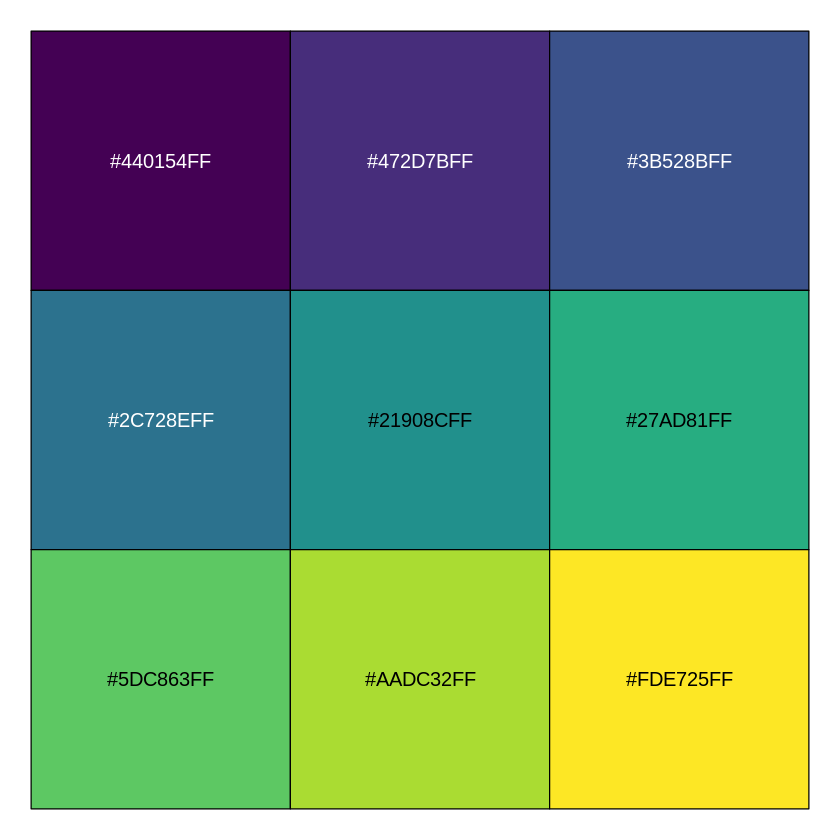

In [15]:
show_col(viridis(9))

**Figure 2.4.1.1** Viridis Color Palette

In [16]:
options(repr.plot.width = 8, repr.plot.height = 8) 
my_colors <- brewer.pal(4, "BuPu")[2:4]

diamonds_cut_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = factor(cut))) +
    geom_point(alpha = 0.5) +
    labs(title = "Price v.s. Carat With Respect to Cut", x = "Carat (ct)", y = "Price ($ USD)", color = "Cut") +
    scale_color_viridis(discrete=TRUE) +
    theme(text = element_text(size=20))

diamonds_clarity_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = factor(clarity))) +
    geom_point(alpha = 0.5) +
    labs(title = "Price v.s. Carat With Respect to Clarity", x = "Carat (ct)", y = "Price ($ USD)", color = "Clarity") +
    scale_color_viridis(discrete=TRUE) +
    theme(text = element_text(size=20))

diamonds_color_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = factor(color))) +
    geom_point(alpha = 0.5) +
    labs(title = "Price v.s. Carat With Respect to Color", x = "Carat (ct)", y = "Price ($ USD)", color = "Color") +
    scale_color_viridis(discrete=TRUE) +
    theme(text = element_text(size=20))

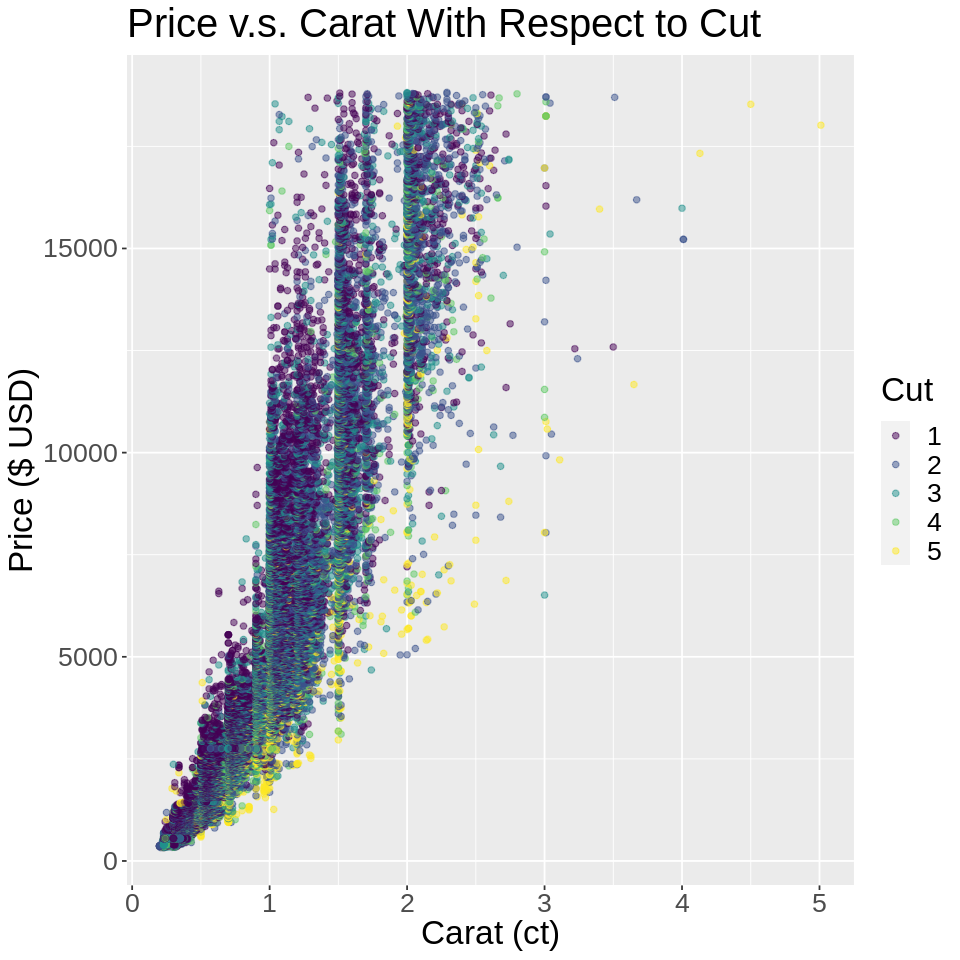

In [17]:
diamonds_cut_plot

**Figure 2.4.1.2** Diamond Price v.s. carat weight with respect to cut

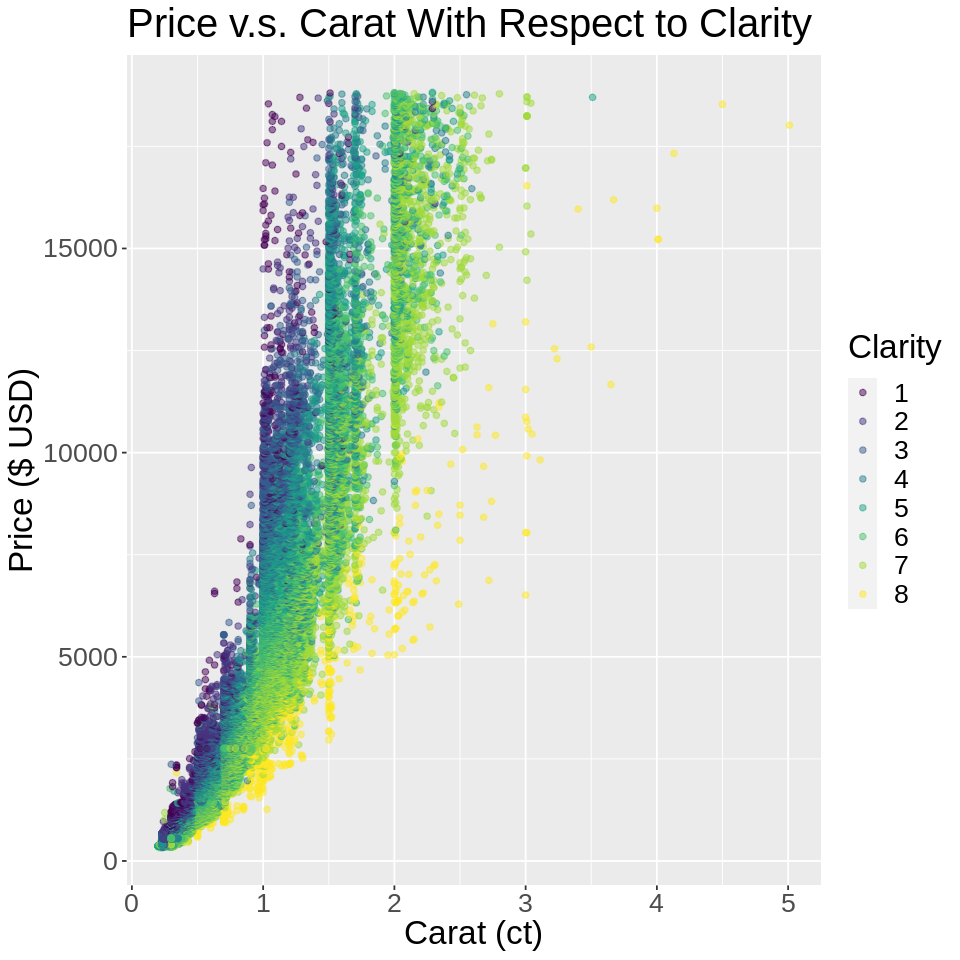

In [18]:
diamonds_clarity_plot

**Figure 2.4.1.3** Diamond Price v.s. carat weight with respect to clarity

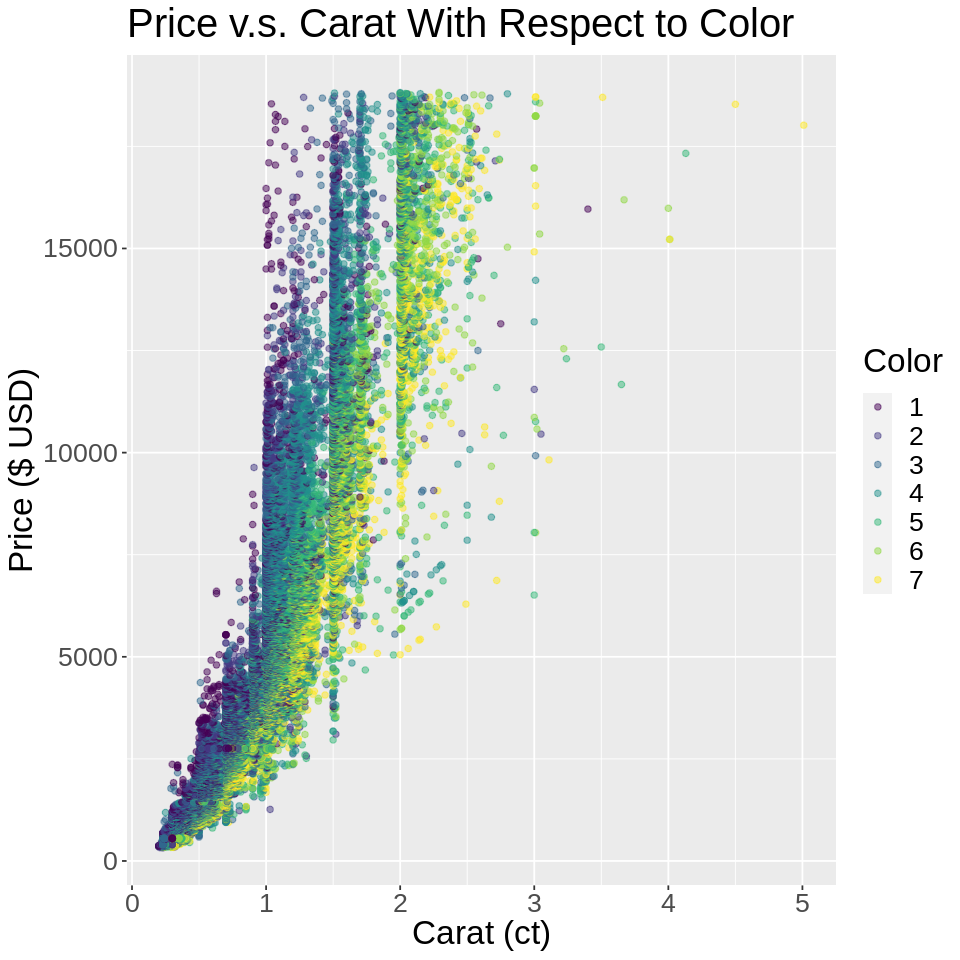

In [19]:
diamonds_color_plot

**Figure 2.4.1.4** Diamond Price v.s. carat weight with respect to color

### 2.5 Training Process I
#### 2.5.1 Why we choose KNN
As our question involves predicting a numerical value, it makes sense to use a regression model. We chose to use KNN regression because it requires few assumptions about what the data must look like, thus making it very versatile. However, a few flaws of KNN regression that could affect us is its inefficiency when dealing with large datasets, and its inability to predict well when given too many predictor variables. 

#### 2.5.2 Training Process
To train our regression model, we first split the data into 75% training and 25% testing (as this seems to be the standard split). As this process is random, we set the seed so that our code is reproducible. The `set.seed` function acts as a random number generator, with the sequence of values being predetermined by the seed value (Campbell et al., 2022). Now, although the splitting of data is still random, running it with a seed value will ensure that the random split is always the same split every time. We then built the recipe to predict the price using the predictors colour, cut, clarity, and carat, with carat being standardized because it was the only numerical predictor thus far. We then performed cross-validation, another method to reduce randomness which could affect the model, (Campbell et al., 2022) two times on the model starting with 5 folds each time to find the best K value to use. The reason why we did cross-validation two times is that initially, we did not know how large or small our K value could be. Thus, to find the K value without crashing the Jupyter notebook, we first ran cross-validation with a broad range of K, skipping by a large value so we can cover a larger interval. The K value that is returned is likely not the best K, since we skipped by a large value between each iteration, but the best K value is very likely close to the first K value returned. We can then run cross-validation again with a smaller interval around that K, incrementing by one, so that we can find the more precise, better K value. In our case, we ran the first cross-validation with K values from 1 to 101, incrementing by 10 each time. This yielded `K = 11` as the best K value, which means that the true best K value is somewhere near 11. Thus, we ran cross-validation again, but this time with K values from 1 to 15, incrementing by 1 each time. This second run gave `K = 4` as the best K value to use. We then ran the model against the testing data with `K = 4`, which resulted in a root mean square percentage error (RMSPE) of \$690 USD.



### 2.6 Training Process II

As we have already run cross-validation on the model, there are not many optimizations left to decrease our RMSPE. However, there is still some room left for improvement. For one, regression models do not predict so well when the predictors are factors rather than numerical values. Since 3 of 4 predictors we used were factors, RMSPE could be reduced by converting these factors into numerical values. Thus, we label-encoded the factors into numerical values so that each sub-category of a factor corresponded to an integer starting from 1. This can be seen in the code under **Table 2.2.4** in section 2.2. This now allowed us to standardize all predictors instead of just the carat predictor to ensure that no single predictor had more weight than another, which could skew the model’s predicted results. From here, the only optimizations that could exist are changing the values that we manually chose; the splitting percentage between training and testing sets, and the number of folds in cross-validation. In reality, changing the proportion of data used in training and testing data sets does not guarantee a decrease in the RMSPE since each split is random. Thus, with different seeds, the same proportional split would yield different RMSPE values. Although the best percentage we would find through testing different proportions of splits for our seed will not be the best proportion to use for any seed, it can still provide a rough range of where a good split proportion can lie in. We can also change the number of folds we perform in cross-validation to try and make our model more accurate. Generally, the more folds you use, the more accurate the model (Campbell et al., 2022), but this is limited to the computational power available. With this in mind, we tried different combinations of proportions and folds to see if there is a better K value to use for our model. 



| %   | k | RMSPE |
|-----|---|-------|
| 65 | 6 | 638.9 |
| 70 | 6 | 638.8 |
| 75 | 6 | 637.7 |
| 80 | 7 | 652.9 |
| 82 | 7 | 633.5 |
| 83 | 7 | 616.9 |
| 85 | 7 | 626.3 |
| 90 | 7 | 631.9 |
| 95 | 8 | 625.0 |

**Table 2.6.1** 5-fold cross-validation


| %     | k | RMSPE       |
|-------|---|-------------|
| 70   | 7 | 636.9      |
| 75   | 8 | 636.5      |
| 80   | 6 | 653.4      |
| 85   | 8 | 626.5      |
| 87.5 | 8 | 636.4      |
| 90   | 8 | 635.9      |
| 92   | 8 | 601.6      |
| 92.5 | 7 | 592.4      |
| 93    | 7 | 592.5      |
| 95    | 8 | 625.0    |

**Table 2.6.2** 6-fold cross-validation


| %     | k | RMSPE     |
|-------|---|-----------|
| 70   | 7 | 636.9  |
| 75   | 7 | 635.2 |
| 80   | 7 | 652.9    |
| 83   | 8 | 616.1   |
| 85   | 7 | 626.3   |
| 90   | 7 | 631.9  |
| 92.5 | 8 | 595.0   |
| 93   | 7 | 592.5   |
| 95   | 7 | 625.0  |

**Table 2.6.3** 7-fold cross-validation


| %     | k | RMSPE       |
|-------|---|-------------|
| 70    | 6 | 653.4 |
| 75    | 8 | 636.5 |
| 80    | 7 | 652.9 |
| 82    | 7 | 633.5 |
| 83    | 7 | 616.9 |
| 85    | 7 | 626.3 |
| 90    | 9 | 634.1 |
| 92    | 7 | 602.8 |
| 92.5  | 8 | 595.0 |
| 93    | 8 | 591.1 |
| 93.5  | 7 | 626.7 |
| 94    | 7 | 630.8 |
| 95    | 7 | 620.9 |

**Table 2.6.4** 8-fold cross-validation

Above are the tables showing the different combinations of proportion and folds we tested against our model for our specific seed. We ran each combination with K values from 1 to 15, since from earlier, we determined that it likely lied in that range. From these tables, we can see that a 93% split with 8 folds yielded a K value of 8 and the lowest RMSPE is \\$591 USD.

In [20]:
# cross-valdiation to find best K value
set.seed(1)
diamonds_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("regression") 

#recipe
diamonds_recipe <- recipe(price ~ ., data = diamonds_train) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors())


# cross validation
diamonds_vfold <- vfold_cv(diamonds_train, v = 8, strata = price)
diamonds_workflow <-  workflow() %>%
    add_recipe(diamonds_recipe) %>%
    add_model(diamonds_spec)

In [21]:
#running cross validtion with K values from 1 to 15
set.seed(1)
gridvals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))
diamonds_results <- diamonds_workflow %>%
    tune_grid(resamples = diamonds_vfold, grid = gridvals) %>%
    collect_metrics()

In [22]:
#results of cross validation
diamonds_results <- diamonds_results %>%
     filter(.metric == "rmse") %>%
     arrange(mean)
diamonds_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,rmse,standard,633.3305,8,7.874482,Model08
9,rmse,standard,633.9597,8,8.246972,Model09
7,rmse,standard,634.5669,8,7.549039,Model07
10,rmse,standard,635.8834,8,7.936485,Model10
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,rmse,standard,654.5215,8,7.992729,Model04
3,rmse,standard,673.8612,8,7.580204,Model03
2,rmse,standard,717.9932,8,9.504477,Model02
1,rmse,standard,832.0021,8,9.120295,Model01


**Table 2.6.5** Diamond result

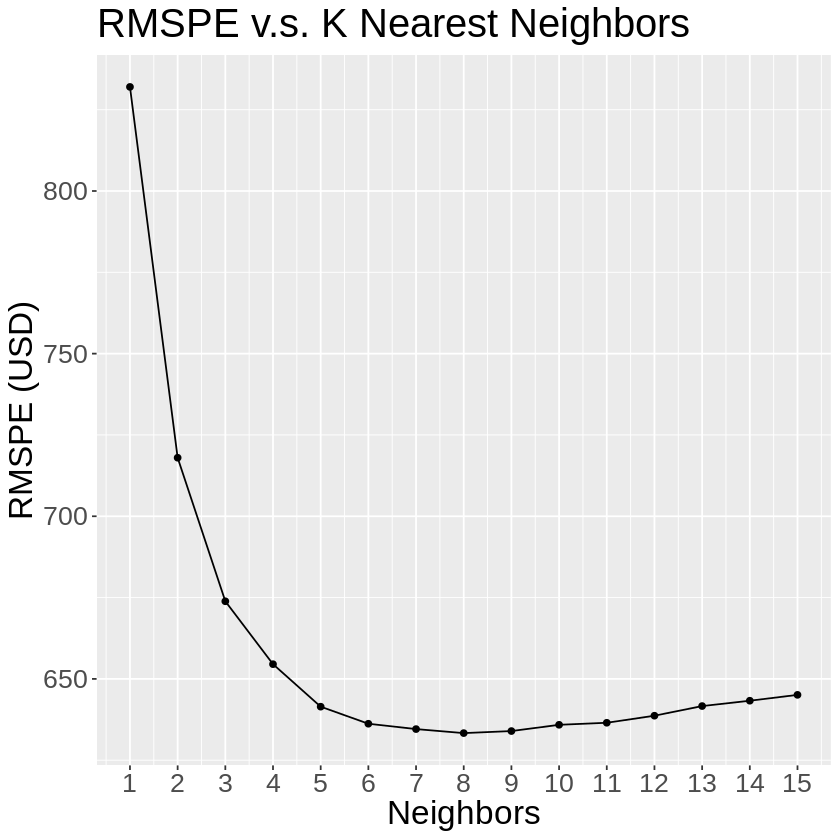

In [30]:
cross_val_plot <- ggplot(diamonds_results, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "RMSPE (USD)", title = "RMSPE v.s. K Nearest Neighbors") +
    scale_x_continuous(breaks = seq(0, 15, by = 1)) + 
    theme(text = element_text(size = 20)) 
cross_val_plot

**Figure 2.6.1** Effect of the number of neighbors on the RMSPE

In [24]:
# finding k_min value
k_min <- diamonds_results %>%
    select(neighbors) %>%
    slice(1) %>%
    pull()
k_min 

[1] 8

In [25]:
diamonds_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

diamonds_best_fit <- workflow() %>%
         add_recipe(diamonds_recipe) %>%
         add_model(diamonds_best_spec) %>%
         fit(data = diamonds_train)

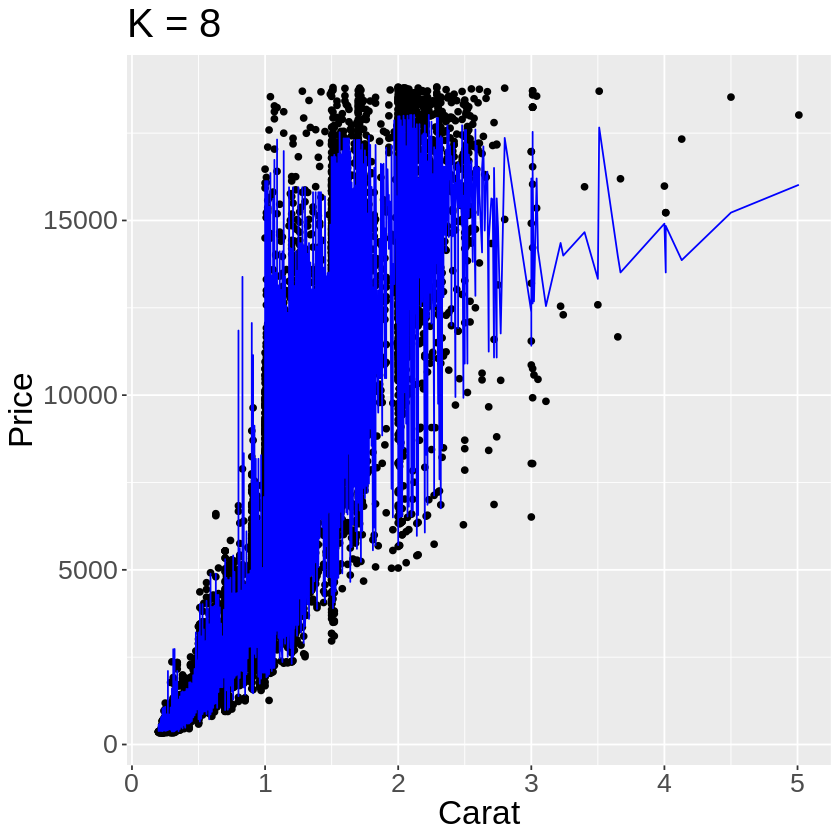

In [26]:
options(repr.plot.width = 7, repr.plot.height = 7)


diamonds_preds <- diamonds_best_fit %>% 
    predict(diamonds_train) %>% 
    bind_cols(diamonds_train)

diamonds_plot <- ggplot(diamonds_train, aes(x = carat, y = price))+
    geom_point() +
    geom_line(data = diamonds_preds, 
            mapping = aes(x = carat, y = .pred), 
            color = "blue") +
    labs(x = "Carat", y = "Price", title = "K = 8")+
    theme(text = element_text(size = 20)) 

diamonds_plot

**Figure 2.6.2** Predicted values of diamond price (blue line) for the final KNN regression model.

### 2.7 Testing Process
Having found this K value and running the model with it against the testing data, we can then visualize the results to see how well our model performed.

In [27]:
diamonds_summary <- diamonds_best_fit %>%
          predict(diamonds_test) %>%
          bind_cols(diamonds_test) %>%
          metrics(truth = price, estimate = .pred)
diamonds_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,590.6287365
rsq,standard,0.9774535
mae,standard,321.9683276


**Table 2.7.1** Summary of Diamonds dataset when `K = 8`

## 3 Discussion
### 3.1 Results
From the initial data visualizations, we noticed that there is a positive, exponential relationship between a diamond’s carat, cut, clarity, and colour with price. As the diamond’s carat increases, a perfectly cut diamond with no hue and impurities would generally result in a higher market price. 
 
Varying the number of folds and proportion of the dataset used for training, we found that our model trained with 93% of the data and 8 cross-validation folds resulted in the minimum RMSPE value of $591. This was incorporated in our final KNN regression model.



### 3.2 Compare with Expected Outcomes
The model is overfitted and it does not follow the overall trend in the training data which we did not expect, and indicates that our model is greatly influenced by the training data, and the classifier may be less reliable on new data. 
 
The main reason that the model could be overfitted is because of the small K-neighbour value `K = 8`. Considering the fact that our data size was extremely large with around 54 000 observations, and 50 000 observations for the training data, it wouldn’t be surprising that looking at only 8 neighbours in such a dense graph would result in overfitting. 8 points only accounts for 0.016% of the entire training data. Thus, these eight points have way more say in where the new point should lie then it should, which is a characteristic of overfitting. Additionally, some points had the exact same predictor values but had different prices, which is likely a result of different shops selling the same quality diamond at different prices due to shipping fees/where the diamond was bought or other unknown factors. This could have also contributed to overfitting and the small K value, since data points would be overlapping. Similarly, increasing the number of variables used as predictors will make the model a better fit for the current data, as it takes more properties into consideration. However, it will end up being a poor model on new data.


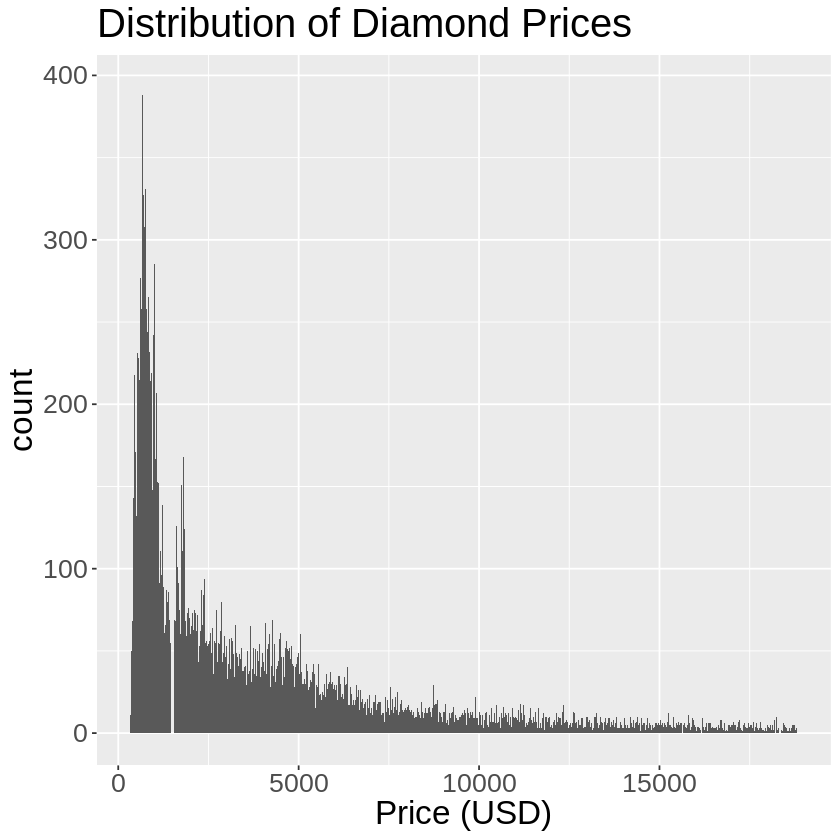

In [28]:
price_distribution_plot <- diamonds %>%
    ggplot(aes(x = price)) +
    geom_histogram(binwidth = 10) + 
    xlab("Price (USD)") + 
    ggtitle("Distribution of Diamond Prices") + 
    theme(text = element_text(size = 20))
price_distribution_plot

**Figure 3.2.1** Distribution of Diamond Prices

In [29]:
distribution_summary <- diamonds %>%
    summarize(median = median(price),
             mean = mean(price), 
             min = min(price), 
             max = max(price))
distribution_summary

median,mean,min,max
<dbl>,<dbl>,<dbl>,<dbl>
2401,3932.8,326,18823


**Table 3.2.1** Diamond Distribution Summary Value

We expected a lower RMPSE than the value \\$591 USD obtained from our model with our accuracy. Some of the diamonds that were on the cheaper end of our dataset were valued below this, with the cheapest diamond being only \\$326 USD, indicating a large relative error and a very poor model. However, the average diamond price in our dataset was \\$3936 USD, and the median was \\$2401 USD, so overall relative error is around 15%-25%. Taking this into consideration, we believe our model is not horrible, but it is not great either. A 15%-25% difference is relatively small compared to the total price, but it can still result in people not buying the diamond because of the price.


### 3.3 Impact of Findings
With our regression model, we are now able to predict the price of a diamond given its 4Cs: colour, cut, clarity and carat. Knowing a rough estimate of a diamond’s price can be beneficial to buyers as they can make comparisons with the market price and determine if it is reasonable before purchasing. Moreover, our model can help those selling diamonds list it for what it's worth. 

### 3.4 Future Discussion Question
Observations from our regression model can lead to further questions and analyses on why some properties result in greater price contrast, and whether there are other variables not considered that also have significant impacts on diamond prices. For future studies, we may choose to expand our model to account for the other properties, such as a diamond’s table and depth, when predicting diamond prices and determine if this would improve our model’s accuracy. As we noticed price fluctuation in our dataset, we could also focus on analyzing diamond prices from a certain/major supplier.

## 4 References

Caliskan, R. (2021, May 15). _Diamonds_, Version 1. Kaggle. Retrieved February 22, 2022 from https://www.kaggle.com/datasets/resulcaliskan/diamonds

Campbell, T., Lee, M., & Timbers, T. (2022). _Data Science: A First Introduction._ CRC Press. https://datasciencebook.ca/index.html

D2UK. (n.d.) _Diamond Grading_. Retrieved April 7, 2022, from https://www.d2ukjewellery.com/diamondgrading 

GIA. (n.d). 4Cs of Diamond Quality. https://4cs.gia.edu/en-us/ 

Sharma, G., Tripathi, V., Mahajan, M., & Kumar Srivastava, A. (2021). Comparative Analysis of Supervised Models for Diamond Price Prediction. 2021 _11th International Conference on Cloud Computing, Data Science & Engineering (Confluence)_. https://doi.org/10.1109/confluence51648.2021.9377183 

Yadav, D. (2019) _Categorical encoding using Label-Encoding and One-Hot-Encoder_. Towards Data Science. https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd